In [2]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
pixelfile = search_targetpixelfile('TIC 427762835', author="TESS-SPOC").download()

/Users/alexeirusu/Desktop/LIGHTCURVE/env/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: title={'center': 'Target ID: 427762835, Cadence: 25788'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

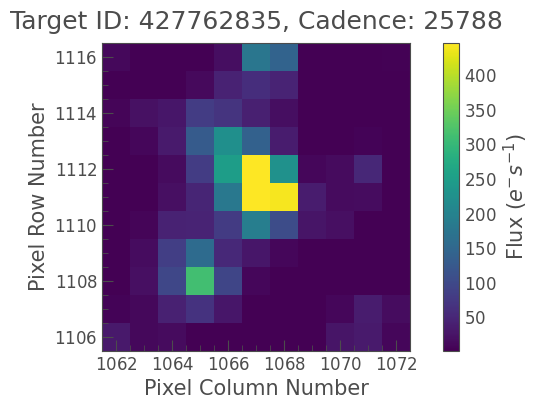

In [3]:
pixelfile.plot()

In [4]:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [5]:
lc.time, lc.flux

(<Time object: scale='tdb' format='btjd' value=[1764.72180809 1764.74264188 1764.76347567 ... 1789.63870398 1789.6595374
  1789.68037084]>,
 <Quantity [5593.637 , 5778.094 , 6046.8647, ..., 6910.574 , 6932.1807,
            6934.7334] electron / s>)

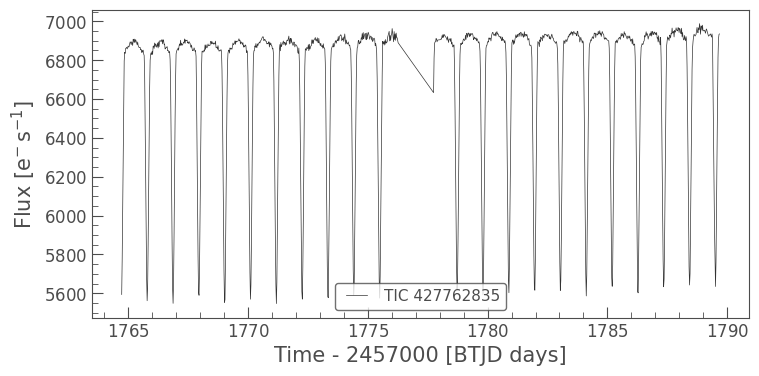

In [6]:
lc.plot()
plt.show()

##### Search for a new star pixelfile

In [19]:
new_pixelfile = search_targetpixelfile('TIC 427762835', author="TESS-SPOC").download()

/Users/alexeirusu/Desktop/LIGHTCURVE/env/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [23]:
star = new_pixelfile.to_lightcurve()

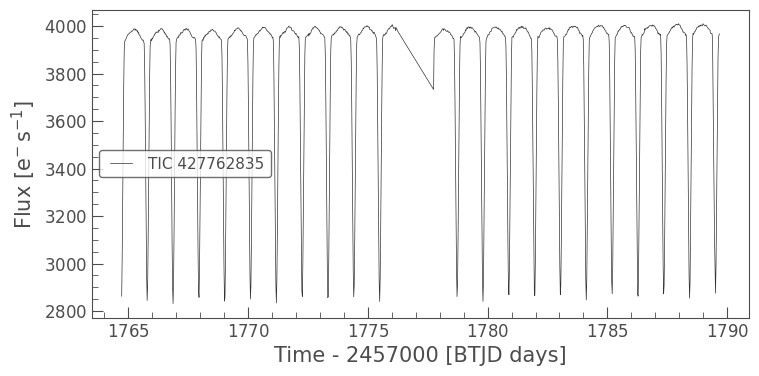

In [24]:
star.plot()
plt.show()

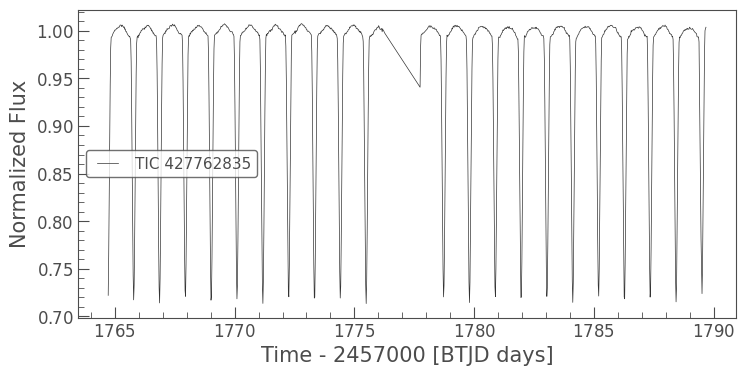

In [25]:
flat_star = star.flatten(window_length=401)
flat_star.plot()
plt.show()

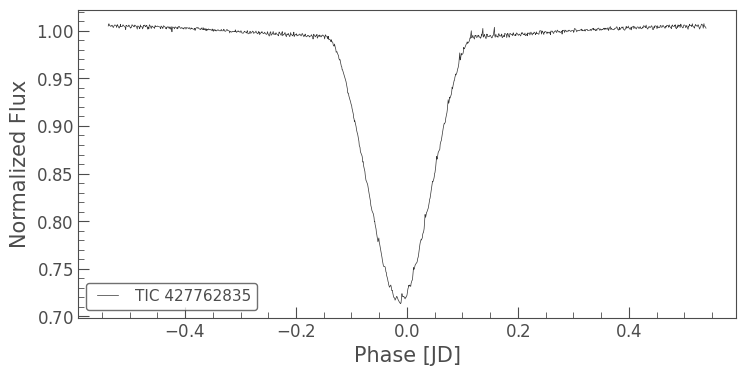

In [27]:
folded_star = flat_star.fold(period=1.0783)
folded_star.plot()
plt.show()

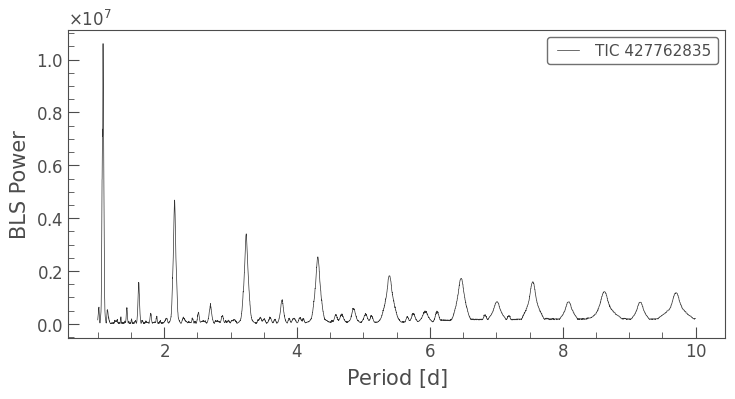

In [63]:
import numpy as np
periodogram = flat_star.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [64]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 1.080 d


<Axes: xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

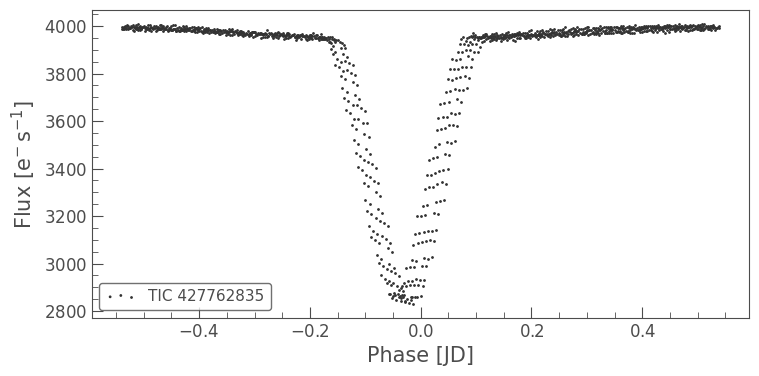

In [65]:
star.fold(period=periodogram.period_at_max_power).scatter()

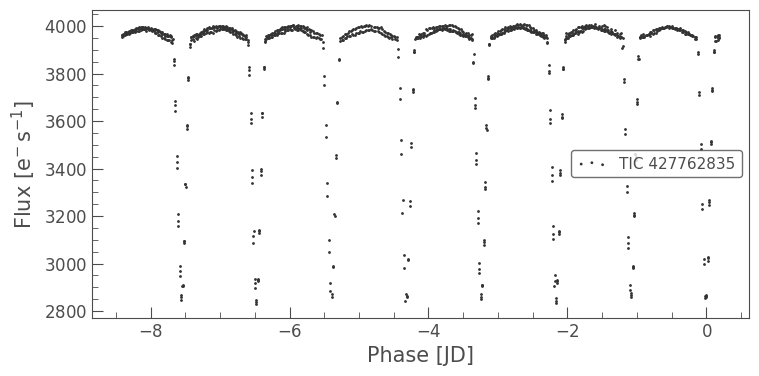

In [60]:
star.fold(period=4*periodogram.period_at_max_power, wrap_phase=0.2).scatter();